Get the file path

Change it accordingly

In [1]:
dataset = '/content/drive/MyDrive/SEM I/ML/Project/dataset/mel_spectrogram.csv'

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models


In [3]:
tf.random.set_seed(654)

Reading the dataset

In [4]:
df = pd.read_csv(dataset)

In [5]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,84442,84443,84444,84445,84446,84447,84448,84449,84450,84451,84452,84453,84454,84455,84456,84457,84458,84459,84460,84461,84462,84463,84464,84465,84466,84467,84468,84469,84470,84471,84472,84473,84474,84475,84476,84477,84478,84479,84480,84481
0,0,blues.00000.wav,-27.959340,-34.706394,-30.291473,-31.983377,-34.712520,-18.918960,-20.786000,-28.10627,-35.856040,-35.904280,-36.504530,-32.118755,-31.677458,-26.533955,-23.813427,-21.617363,-14.048180,-24.199493,-33.999527,-36.415924,-40.772915,-32.690970,-22.652718,-22.967869,-25.783073,-30.429130,-21.605950,-25.544498,-27.763210,-33.735020,-36.025246,-38.631720,-29.883858,-32.092583,-35.968117,-35.937817,-21.768057,-22.972050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
1,1,blues.00001.wav,-29.381193,-17.828934,-16.082321,-21.429170,-23.704780,-29.580908,-28.251745,-31.71809,-36.745407,-38.221283,-41.737850,-43.955067,-36.975353,-20.525597,-14.919221,-16.554745,-22.336693,-20.584965,-20.592157,-21.792213,-25.131550,-12.180038,-23.016186,-20.796227,-30.270826,-26.505362,-36.738990,-32.183937,-37.420662,-37.494846,-40.593790,-37.265068,-26.846375,-20.042677,-25.594904,-26.441830,-17.955648,-14.827249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
2,2,blues.00002.wav,-32.368137,-38.951023,-38.105515,-36.680084,-33.892110,-34.302193,-28.007008,-34.43401,-39.126560,-44.014328,-40.307808,-32.969776,-32.193592,-35.651165,-33.787464,-34.067024,-36.649410,-31.005987,-37.276066,-34.375584,-32.387005,-34.960064,-23.139534,-21.051832,-30.559265,-41.534122,-44.778680,-35.793655,-33.387196,-35.949196,-38.043518,-40.918300,-44.696213,-50.163307,-48.951973,-46.418003,-39.718956,-31.483374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
3,3,blues.00003.wav,-22.884243,-38.427704,-44.643795,-43.343050,-49.787850,-49.419290,-45.321747,-45.88495,-48.977386,-47.326610,-46.515022,-52.741570,-51.650406,-51.359726,-42.042610,-44.222225,-47.610000,-53.495735,-53.170555,-49.835796,-56.225395,-56.497612,-53.799065,-60.731490,-53.530594,-54.583534,-55.213127,-40.041860,-39.233162,-42.647960,-42.777400,-42.645737,-40.984337,-37.718270,-38.529950,-38.173298,-49.670975,-49.856270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
4,4,blues.00004.wav,-52.681557,-53.033882,-52.625343,-54.882698,-45.236115,-44.029240,-50.053173,-53.21808,-59.152702,-54.893375,-62.720757,-60.298935,-66.736040,-50.929030,-47.508102,-47.918350,-53.200146,-51.857197,-56.816242,-62.815773,-57.169020,-48.454998,-57.374970,-45.014214,-45.077720,-50.579390,-50.336770,-55.873100,-56.877136,-56.664180,-56.056450,-57.675537,-59.510147,-52.977910,-51.171867,-51.213600,-56.386772,-65.103880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues


In [6]:
df.shape

(1000, 84483)

Removing first two columns in a different df

In [7]:
df2 = df.iloc[:, 2:]

df2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,84442,84443,84444,84445,84446,84447,84448,84449,84450,84451,84452,84453,84454,84455,84456,84457,84458,84459,84460,84461,84462,84463,84464,84465,84466,84467,84468,84469,84470,84471,84472,84473,84474,84475,84476,84477,84478,84479,84480,84481
0,-27.959340,-34.706394,-30.291473,-31.983377,-34.712520,-18.918960,-20.786000,-28.10627,-35.856040,-35.904280,-36.504530,-32.118755,-31.677458,-26.533955,-23.813427,-21.617363,-14.048180,-24.199493,-33.999527,-36.415924,-40.772915,-32.690970,-22.652718,-22.967869,-25.783073,-30.429130,-21.605950,-25.544498,-27.763210,-33.735020,-36.025246,-38.631720,-29.883858,-32.092583,-35.968117,-35.937817,-21.768057,-22.972050,-26.751507,-29.421822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
1,-29.381193,-17.828934,-16.082321,-21.429170,-23.704780,-29.580908,-28.251745,-31.71809,-36.745407,-38.221283,-41.737850,-43.955067,-36.975353,-20.525597,-14.919221,-16.554745,-22.336693,-20.584965,-20.592157,-21.792213,-25.131550,-12.180038,-23.016186,-20.796227,-30.270826,-26.505362,-36.738990,-32.183937,-37.420662,-37.494846,-40.593790,-37.265068,-26.846375,-20.042677,-25.594904,-26.441830,-17.955648,-14.827249,-19.345654,-19.746159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
2,-32.368137,-38.951023,-38.105515,-36.680084,-33.892110,-34.302193,-28.007008,-34.43401,-39.126560,-44.014328,-40.307808,-32.969776,-32.193592,-35.651165,-33.787464,-34.067024,-36.649410,-31.005987,-37.276066,-34.375584,-32.387005,-34.960064,-23.139534,-21.051832,-30.559265,-41.534122,-44.778680,-35.793655,-33.387196,-35.949196,-38.043518,-40.918300,-44.696213,-50.163307,-48.951973,-46.418003,-39.718956,-31.483374,-35.007070,-26.686280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
3,-22.884243,-38.427704,-44.643795,-43.343050,-49.787850,-49.419290,-45.321747,-45.88495,-48.977386,-47.326610,-46.515022,-52.741570,-51.650406,-51.359726,-42.042610,-44.222225,-47.610000,-53.495735,-53.170555,-49.835796,-56.225395,-56.497612,-53.799065,-60.731490,-53.530594,-54.583534,-55.213127,-40.041860,-39.233162,-42.647960,-42.777400,-42.645737,-40.984337,-37.718270,-38.529950,-38.173298,-49.670975,-49.856270,-53.317207,-54.997627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
4,-52.681557,-53.033882,-52.625343,-54.882698,-45.236115,-44.029240,-50.053173,-53.21808,-59.152702,-54.893375,-62.720757,-60.298935,-66.736040,-50.929030,-47.508102,-47.918350,-53.200146,-51.857197,-56.816242,-62.815773,-57.169020,-48.454998,-57.374970,-45.014214,-45.077720,-50.579390,-50.336770,-55.873100,-56.877136,-56.664180,-56.056450,-57.675537,-59.510147,-52.977910,-51.171867,-51.213600,-56.386772,-65.103880,-65.839676,-58.632150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues


In [8]:
df2.shape

(1000, 84481)

Seperating X and Y

In [9]:
X = df2.iloc[:, :-1]
X.shape

(1000, 84480)

In [10]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,84441,84442,84443,84444,84445,84446,84447,84448,84449,84450,84451,84452,84453,84454,84455,84456,84457,84458,84459,84460,84461,84462,84463,84464,84465,84466,84467,84468,84469,84470,84471,84472,84473,84474,84475,84476,84477,84478,84479,84480
0,-27.959340,-34.706394,-30.291473,-31.983377,-34.712520,-18.918960,-20.786000,-28.10627,-35.856040,-35.904280,-36.504530,-32.118755,-31.677458,-26.533955,-23.813427,-21.617363,-14.048180,-24.199493,-33.999527,-36.415924,-40.772915,-32.690970,-22.652718,-22.967869,-25.783073,-30.429130,-21.605950,-25.544498,-27.763210,-33.735020,-36.025246,-38.631720,-29.883858,-32.092583,-35.968117,-35.937817,-21.768057,-22.972050,-26.751507,-29.421822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-29.381193,-17.828934,-16.082321,-21.429170,-23.704780,-29.580908,-28.251745,-31.71809,-36.745407,-38.221283,-41.737850,-43.955067,-36.975353,-20.525597,-14.919221,-16.554745,-22.336693,-20.584965,-20.592157,-21.792213,-25.131550,-12.180038,-23.016186,-20.796227,-30.270826,-26.505362,-36.738990,-32.183937,-37.420662,-37.494846,-40.593790,-37.265068,-26.846375,-20.042677,-25.594904,-26.441830,-17.955648,-14.827249,-19.345654,-19.746159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-32.368137,-38.951023,-38.105515,-36.680084,-33.892110,-34.302193,-28.007008,-34.43401,-39.126560,-44.014328,-40.307808,-32.969776,-32.193592,-35.651165,-33.787464,-34.067024,-36.649410,-31.005987,-37.276066,-34.375584,-32.387005,-34.960064,-23.139534,-21.051832,-30.559265,-41.534122,-44.778680,-35.793655,-33.387196,-35.949196,-38.043518,-40.918300,-44.696213,-50.163307,-48.951973,-46.418003,-39.718956,-31.483374,-35.007070,-26.686280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-22.884243,-38.427704,-44.643795,-43.343050,-49.787850,-49.419290,-45.321747,-45.88495,-48.977386,-47.326610,-46.515022,-52.741570,-51.650406,-51.359726,-42.042610,-44.222225,-47.610000,-53.495735,-53.170555,-49.835796,-56.225395,-56.497612,-53.799065,-60.731490,-53.530594,-54.583534,-55.213127,-40.041860,-39.233162,-42.647960,-42.777400,-42.645737,-40.984337,-37.718270,-38.529950,-38.173298,-49.670975,-49.856270,-53.317207,-54.997627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-52.681557,-53.033882,-52.625343,-54.882698,-45.236115,-44.029240,-50.053173,-53.21808,-59.152702,-54.893375,-62.720757,-60.298935,-66.736040,-50.929030,-47.508102,-47.918350,-53.200146,-51.857197,-56.816242,-62.815773,-57.169020,-48.454998,-57.374970,-45.014214,-45.077720,-50.579390,-50.336770,-55.873100,-56.877136,-56.664180,-56.056450,-57.675537,-59.510147,-52.977910,-51.171867,-51.213600,-56.386772,-65.103880,-65.839676,-58.632150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
Y = df2.iloc[:, -1]
Y.head()

0    blues
1    blues
2    blues
3    blues
4    blues
Name: 84481, dtype: object

In [12]:
Y.shape

(1000,)

Encoding the labels using one hot encoding

In [13]:
oht = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [14]:
y_enc = oht.fit_transform(Y.to_frame())

In [15]:
y_enc.shape

(1000, 10)

Splitting dataset into train, validation and test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, random_state=42, stratify=y_enc, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train, test_size=0.2)

In [17]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(640, 84480) (640, 10)
(160, 84480) (160, 10)
(200, 84480) (200, 10)


Scaling the dataset

In [18]:
X_train /= -80
X_val /= -80
X_test /= -80

Converting to numpy and converting into original dimension

In [19]:
x_train = X_train.to_numpy()
x_val = X_val.to_numpy()
x_test = X_test.to_numpy()

In [20]:
x_train = x_train.reshape(x_train.shape[0], 128, 660, 1)
x_val = x_val.reshape(x_val.shape[0], 128, 660, 1)
x_test = x_test.reshape(x_test.shape[0], 128, 660, 1)

In [21]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(640, 128, 660, 1)
(160, 128, 660, 1)
(200, 128, 660, 1)


Model creation and training

In [22]:

cnn_model = models.Sequential(name='cnn')

cnn_model.add(Conv2D(filters=16,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(128,660,1)))

cnn_model.add(Conv2D(filters=16,
                     kernel_size=(3,3),
                     activation='relu'))

cnn_model.add(MaxPool2D(pool_size=(2,4)))

cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     activation='tanh'))

cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     activation='tanh'))

cnn_model.add(MaxPool2D(pool_size=(2,4)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='tanh'))

cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(10, activation='softmax'))

In [23]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [24]:
cnn_model.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 658, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 656, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 164, 16)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 162, 32)       4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 160, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 40, 32)       0         
 2D)                                                           

In [25]:
tf.random.set_seed(654)

In [26]:
history = cnn_model.fit(x_train, y_train, 
                    batch_size=64, 
                    validation_data = (x_val, y_val),
                    epochs = 15, shuffle=True)

Epoch 1/15
10/10 [==============================] - 9s 397ms/step - loss: 3.3767 - accuracy: 0.0953 - val_loss: 2.3609 - val_accuracy: 0.1187
Epoch 2/15
10/10 [==============================] - 3s 288ms/step - loss: 2.4452 - accuracy: 0.1531 - val_loss: 2.2602 - val_accuracy: 0.2062
Epoch 3/15
10/10 [==============================] - 3s 289ms/step - loss: 2.0679 - accuracy: 0.3187 - val_loss: 1.9399 - val_accuracy: 0.3562
Epoch 4/15
10/10 [==============================] - 3s 289ms/step - loss: 1.7849 - accuracy: 0.3938 - val_loss: 1.7605 - val_accuracy: 0.4000
Epoch 5/15
10/10 [==============================] - 3s 288ms/step - loss: 1.4825 - accuracy: 0.4844 - val_loss: 1.5077 - val_accuracy: 0.4313
Epoch 6/15
10/10 [==============================] - 3s 292ms/step - loss: 1.1823 - accuracy: 0.6141 - val_loss: 1.2766 - val_accuracy: 0.6187
Epoch 7/15
10/10 [==============================] - 3s 291ms/step - loss: 0.9121 - accuracy: 0.7406 - val_loss: 1.2188 - val_accuracy: 0.5625
Epoch 

Model metrics

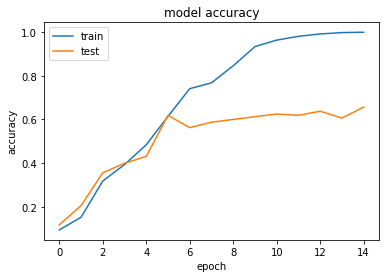

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

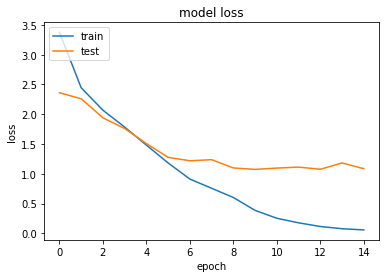

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Accuracy on test data

In [29]:
loss, accuracy = cnn_model.evaluate(x_test, y_test)

print("Loss :", loss)
print("Accuracy: ", accuracy)

7/7 [==============================] - 1s 102ms/step - loss: 0.9997 - accuracy: 0.7000
Loss : 0.999694287776947
Accuracy:  0.699999988079071


Confusion Matrix

In [30]:
predictions = cnn_model.predict(x_test)

In [31]:
pred = np.argmax(predictions, axis=1)

In [32]:
y_test_np = np.argmax(y_test, axis=1)

In [33]:
cf = tf.math.confusion_matrix(y_test_np, pred)

In [34]:
print(cf)

tf.Tensor(
[[14  0  0  1  0  3  1  0  1  0]
 [ 0 19  0  0  0  1  0  0  0  0]
 [ 4  1  9  0  1  1  0  0  0  4]
 [ 1  1  1  9  1  0  0  0  3  4]
 [ 0  0  0  0 17  0  1  0  2  0]
 [ 2  3  2  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  2]
 [ 0  0  0  1  1  0  0 16  2  0]
 [ 2  1  0  0  1  0  0  1 15  0]
 [ 4  0  2  0  0  1  0  1  2 10]], shape=(10, 10), dtype=int32)


Saving the model

In [35]:
cnn_model.save('model.h5')